In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/sample_data/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df = df.dropna()
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
df['Year'] = df['Year'].astype(int)
df.rename(columns = lambda x: x.lower(), inplace=True)
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.shape

(16291, 11)

In [ ]:
df = df[df['year']>1994][df['year']<2017]

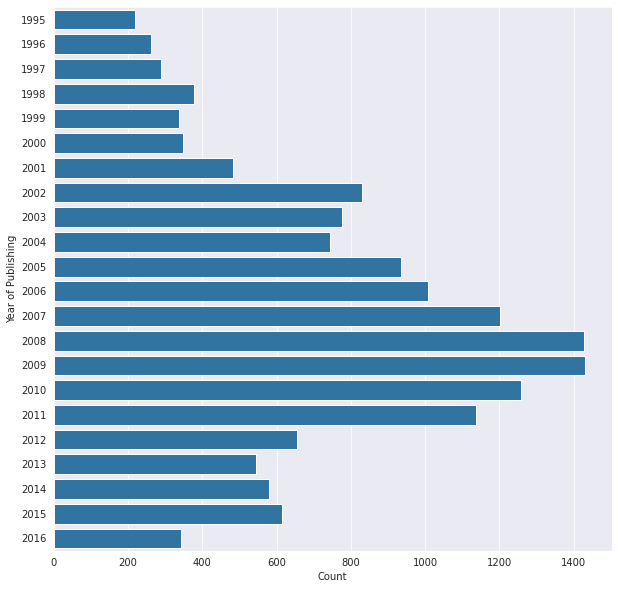

In [ ]:
plt.figure(figsize=(10,10))
ax = sb.countplot(data=df,y='year',color=sb.color_palette()[0]);
plt.xlabel('Count');
plt.ylabel('Year of Publishing');

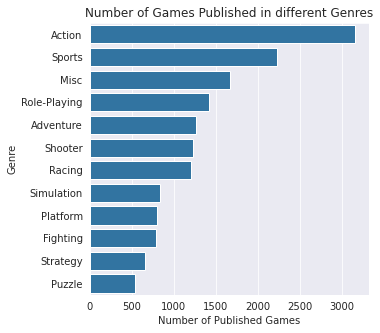

In [ ]:
plt.figure(figsize=(5,5));
sb.countplot(data=df,y='genre',color=sb.color_palette()[0],order=df.genre.value_counts().index);
plt.ylabel('Genre');
plt.xlabel('Number of Published Games');
plt.title('Number of Games Published in different Genres');

In [ ]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,15801.000000,15801.000000,15801.000000,15801.000000,15801.000000,15801.000000,15801.000000
mean,8394.104614,2006.935953,0.251652,0.147628,0.067327,0.049040,0.515924
std,4771.168275,4.978696,0.719933,0.511797,0.280866,0.192173,1.481146
min,1.000000,1995.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4277.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8442.000000,2008.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12522.000000,2010.000000,0.230000,0.110000,0.030000,0.040000,0.460000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


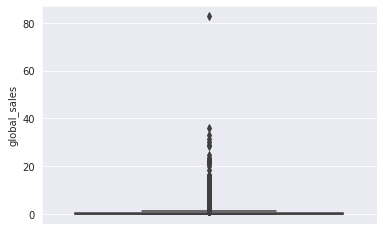

In [ ]:
sb.boxplot(data=df,y='global_sales');

In [ ]:
df_no_outliers = df[df['global_sales'] <= 0.46+(1.5*(0.46-0.06))]
df.shape[0] - df_no_outliers.shape[0]

1748

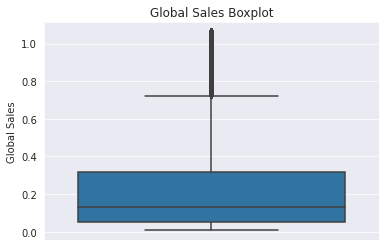

In [ ]:
sb.boxplot(data=df_no_outliers,y='global_sales');
plt.ylabel('Global Sales');
plt.title('Global Sales Boxplot');

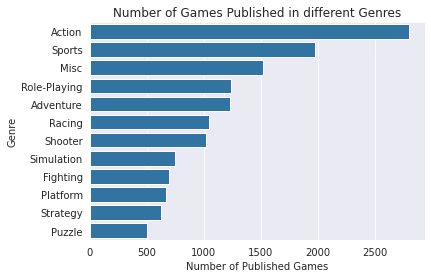

In [ ]:
sb.countplot(data=df_no_outliers,y='genre',color=sb.color_palette()[0],order=df_no_outliers.genre.value_counts().index);
plt.ylabel('Genre');
plt.xlabel('Number of Published Games');
plt.title('Number of Games Published in different Genres');

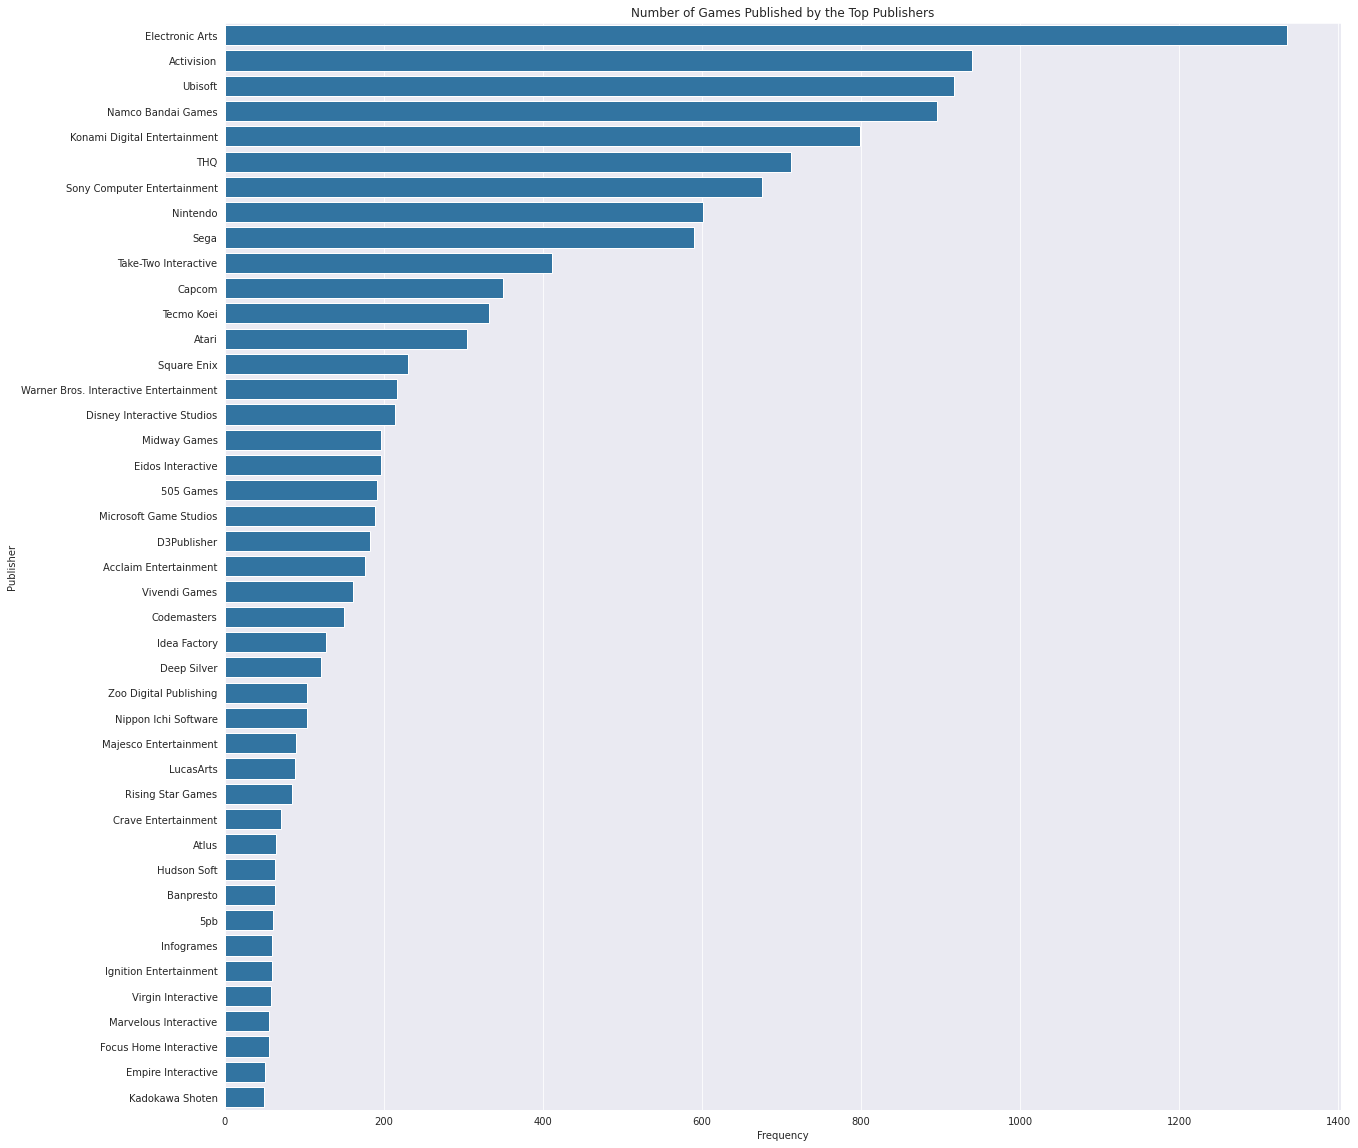

In [ ]:
 #Getting a list of publishers who have published 50+ games
arr = df_no_outliers.publisher.value_counts() >= 50
for x in arr.keys():
    if not arr[x]:
        arr.pop(x)

#Removing the "Unkown" publisher which is assigned when information on the publisher was not available
if 'Unknown' in arr.keys():
    arr.pop('Unknown')

#Creating a countplot of publishers
df_big_publishers = df[df['publisher'].isin(arr.keys())]
plt.subplots(figsize=(20,20));
sb.countplot(data=df_big_publishers,y='publisher',color=sb.color_palette()[0],order=df_big_publishers.publisher.value_counts().index);
plt.ylabel('Publisher');
plt.xlabel('Frequency');
plt.title('Number of Games Published by the Top Publishers');

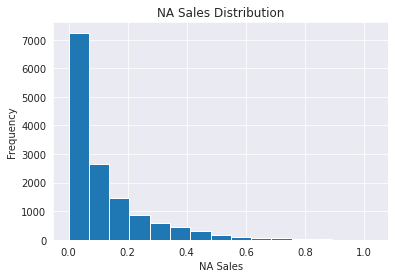

In [ ]:
plt.hist(data=df_no_outliers,x='na_sales',bins=15);
plt.xlabel('NA Sales');
plt.ylabel('Frequency');
plt.title('NA Sales Distribution');

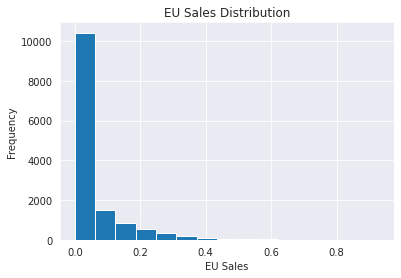

In [ ]:
plt.hist(data=df_no_outliers,x='eu_sales',bins=15);
plt.xlabel('EU Sales');
plt.ylabel('Frequency');
plt.title('EU Sales Distribution');

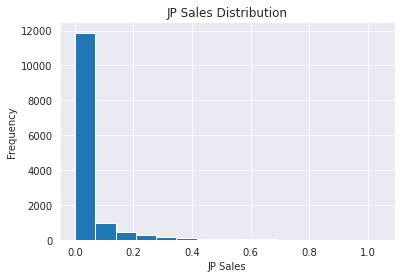

In [ ]:
plt.hist(data=df_no_outliers,x='jp_sales',bins=15);
plt.xlabel('JP Sales');
plt.ylabel('Frequency');
plt.title('JP Sales Distribution');

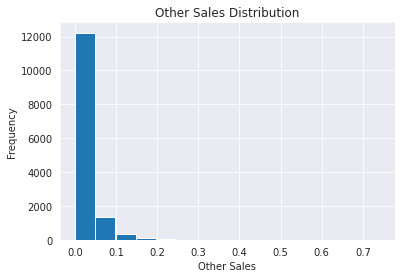

In [ ]:
plt.hist(data=df_no_outliers,x='other_sales',bins=15);
plt.xlabel('Other Sales');
plt.ylabel('Frequency');
plt.title('Other Sales Distribution');

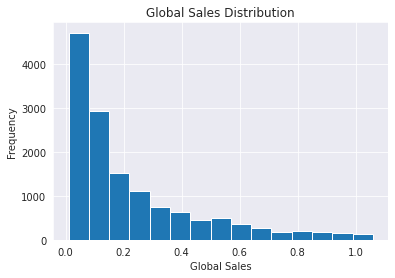

In [ ]:
plt.hist(data=df_no_outliers,x='global_sales',bins=15);
plt.xlabel('Global Sales');
plt.ylabel('Frequency');
plt.title('Global Sales Distribution');

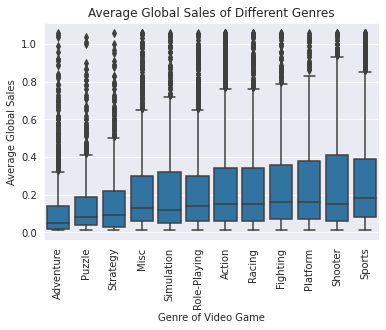

In [ ]:
#Sorting the boxes in the boxplot in order of ascending average global sales 
order = df_no_outliers.groupby(['genre']).mean()['global_sales'].sort_values(ascending=True).index.tolist()

#Creating the boxplot
sb.boxplot(data=df_no_outliers,x='genre',y='global_sales',color=sb.color_palette()[0],order=order);
plt.xlabel('Genre of Video Game')
plt.ylabel('Average Global Sales')
plt.title('Average Global Sales of Different Genres')
plt.xticks(rotation='90');

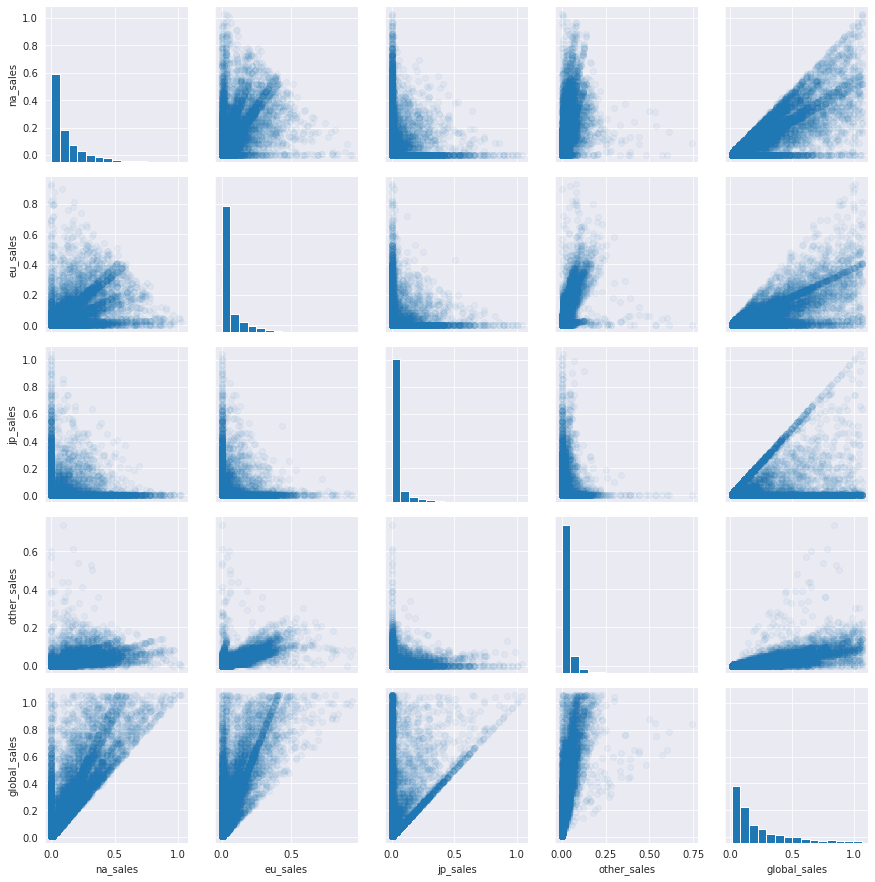

In [ ]:
graph = sb.PairGrid(data=df_no_outliers,vars=['na_sales','eu_sales','jp_sales','other_sales','global_sales'])
graph.map_offdiag(plt.scatter,alpha=0.05);
graph.map_diag(plt.hist,bins=15)

In [ ]:
from scipy.stats import pearsonr
corr,_ = pearsonr(df_no_outliers['global_sales'],df_no_outliers['na_sales'])
print("NA sales: " + str(corr))
corr,_ = pearsonr(df_no_outliers['global_sales'],df_no_outliers['eu_sales'])
print("EU sales: " + str(corr))
corr,_ = pearsonr(df_no_outliers['global_sales'],df_no_outliers['jp_sales'])
print("JP sales: " + str(corr))
corr,_ = pearsonr(df_no_outliers['global_sales'],df_no_outliers['other_sales'])
print("other sales: " + str(corr))

NA sales: 0.8124001957752284
EU sales: 0.7288967054954287
JP sales: 0.2506728638080398
other sales: 0.6836032616237837


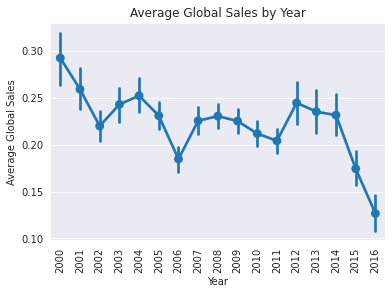

In [ ]:
sb.pointplot(data=df_no_outliers[df_no_outliers['year'] >= 2000],x='year',y='global_sales')
plt.xticks(rotation='90');
plt.xlabel('Year');
plt.ylabel('Average Global Sales');
plt.title('Average Global Sales by Year');

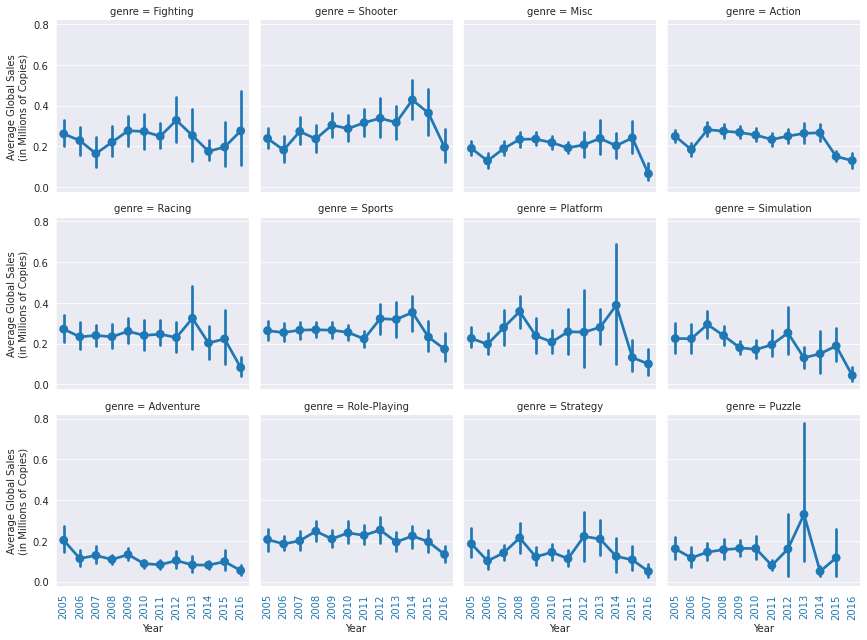

In [ ]:
graph = sb.FacetGrid(data=df_no_outliers[df_no_outliers['year']>=2005],col='genre',col_wrap=4,sharex=True, sharey=True)
graph.map(sb.pointplot,'year','global_sales', order = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]);
graph.map(plt.xticks,rotation=90);
graph.set_xlabels('Year');
graph.set_ylabels('Average Global Sales\n(in Millions of Copies)');

In [ ]:
#Creating a new dataframe grouped by the years after 2005 with the sum of each of the sales figures features recorded in each year's record
df_years = df_no_outliers[['year','na_sales','eu_sales','jp_sales','other_sales','global_sales']][df_no_outliers['year'] >= 2005]
df_years = df_years.groupby(['year']).sum()

In [ ]:
#Creating new columns to hold the proportions of the sales figures
props_and_sales = [('na_prop','na_sales'),('eu_prop','eu_sales'),('jp_prop','jp_sales'),('other_prop','other_sales')]
for prop,sales in props_and_sales:
    df_years[prop] = df_years[sales]/df_years['global_sales']
df_years['year']=df_years.index
df_years = df_years[df_years['year']<2017]

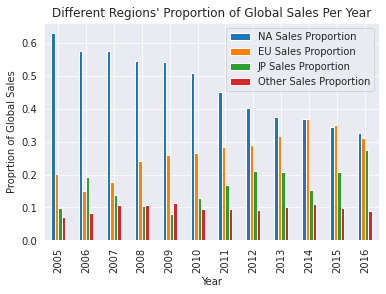

In [ ]:
df_years.plot(x='year',y=['na_prop','eu_prop','jp_prop','other_prop'],kind='bar',ylabel='Proprtion of Global Sales')
plt.legend(['NA Sales Proportion','EU Sales Proportion','JP Sales Proportion','Other Sales Proportion']);
plt.xlabel('Year');
plt.title("Different Regions' Proportion of Global Sales Per Year");

In [104]:

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [105]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,10459,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,5279,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,10461,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,6990,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,7,6390,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


In [106]:
number = LabelEncoder()
df['name'] = number.fit_transform(df['name'])
df['genre'] = number.fit_transform(df['genre'])
df['publisher'] = number.fit_transform(df['publisher'])

In [107]:
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,10459,Wii,2006,10,340,41.49,29.02,3.77,8.46,82.74
2,3,5279,Wii,2008,6,340,15.85,12.88,3.79,3.31,35.82
3,4,10461,Wii,2009,10,340,15.75,11.01,3.28,2.96,33.00
4,5,6990,GB,1996,7,340,11.27,8.89,10.22,1.00,31.37
6,7,6390,DS,2006,4,340,11.38,9.23,6.50,2.90,30.01
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,10549,GBA,2002,4,255,0.01,0.00,0.00,0.00,0.01
16594,16597,5486,GC,2003,8,227,0.01,0.00,0.00,0.00,0.01
16595,16598,7752,PS2,2008,6,20,0.00,0.00,0.00,0.00,0.01
16596,16599,4738,DS,2010,5,7,0.00,0.01,0.00,0.00,0.01


In [145]:
del df['platform']

In [172]:
df

,rank,name,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,10459,2006,10,340,41.49,29.02,3.77,8.46,82.74
2,3,5279,2008,6,340,15.85,12.88,3.79,3.31,35.82
3,4,10461,2009,10,340,15.75,11.01,3.28,2.96,33.00
4,5,6990,1996,7,340,11.27,8.89,10.22,1.00,31.37
6,7,6390,2006,4,340,11.38,9.23,6.50,2.90,30.01
...,...,...,...,...,...,...,...,...,...,...
16593,16596,10549,2002,4,255,0.01,0.00,0.00,0.00,0.01
16594,16597,5486,2003,8,227,0.01,0.00,0.00,0.00,0.01
16595,16598,7752,2008,6,20,0.00,0.00,0.00,0.00,0.01
16596,16599,4738,2010,5,7,0.00,0.01,0.00,0.00,0.01


In [194]:
df_train = df[0:84]

In [195]:
df_train

,rank,name,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,10459,2006,10,340,41.49,29.02,3.77,8.46,82.74
2,3,5279,2008,6,340,15.85,12.88,3.79,3.31,35.82
3,4,10461,2009,10,340,15.75,11.01,3.28,2.96,33.00
4,5,6990,1996,7,340,11.27,8.89,10.22,1.00,31.37
6,7,6390,2006,4,340,11.38,9.23,6.50,2.90,30.01
...,...,...,...,...,...,...,...,...,...,...
90,91,3497,2005,0,468,2.90,2.83,0.24,1.75,7.72
91,92,8866,2010,4,340,3.66,2.42,0.98,0.64,7.69
92,93,8634,2015,8,129,2.93,3.29,0.22,1.23,7.67
93,94,1166,2014,8,20,2.80,3.30,0.14,1.37,7.60


In [196]:
df_test = df[84:]

In [197]:
df_test

,rank,name,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
95,96,1579,1997,4,433,3.78,2.17,1.31,0.31,7.58
97,98,8937,2014,2,340,3.24,1.35,2.42,0.43,7.45
98,99,1180,2008,8,20,4.79,1.90,0.00,0.69,7.37
99,100,682,2011,8,129,4.46,2.13,0.06,0.69,7.34
100,101,9459,2006,0,340,3.83,2.19,0.60,0.70,7.31
...,...,...,...,...,...,...,...,...,...,...
16593,16596,10549,2002,4,255,0.01,0.00,0.00,0.00,0.01
16594,16597,5486,2003,8,227,0.01,0.00,0.00,0.00,0.01
16595,16598,7752,2008,6,20,0.00,0.00,0.00,0.00,0.01
16596,16599,4738,2010,5,7,0.00,0.01,0.00,0.00,0.01


In [203]:
X_train = df_train.iloc[:,1:4]
y_train = df_train.iloc[:,4:5]

In [204]:
print(X_train.shape)
print(y_train.shape)

(84, 3)
(84, 1)


In [205]:
X_train

,name,year,genre
0,10459,2006,10
2,5279,2008,6
3,10461,2009,10
4,6990,1996,7
6,6390,2006,4
...,...,...,...
90,3497,2005,0
91,8866,2010,4
92,8634,2015,8
93,1166,2014,8


In [206]:
y_train

,publisher
0,340
2,340
3,340
4,340
6,340
...,...
90,468
91,340
92,129
93,20


In [207]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [212]:
X_test = df_test.iloc[:,1:4]
X_test

,name,year,genre
95,1579,1997,4
97,8937,2014,2
98,1180,2008,8
99,682,2011,8
100,9459,2006,0
...,...,...,...
16593,10549,2002,4
16594,5486,2003,8
16595,7752,2008,6
16596,4738,2010,5


In [208]:
pred = model.predict(X_test)

In [209]:
pred

array([340, 340,  20, ..., 340, 308, 340])

In [210]:
pred_proba = model.predict_proba(X_test)

In [211]:
pred_proba

array([[0.00000000e+00, 0.00000000e+00, 3.10768458e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.02900398e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.81287180e-01, 0.00000000e+00, 1.33235499e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.67794482e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.34130737e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.35153711e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])